## 🏨 GTC ML Project 1 - Hotel Bookings

                    *Data Cleaning & Preprocessing Challenge*                   

This project focuses on cleaning and preprocessing the hotel bookings dataset in order to prepare it for machine learning models. The process is divided into 3 main phases:
1. Exploratory Data Analysis (EDA)
2. Data Cleaning
3. Feature Engineering & Preprocessing

### Data Description
This project uses the Hotel Booking Demand dataset sourced from a Property Management System (PMS).
The dataset (hotel_bookings.csv) contains 119,390 rows and 32 columns describing customer booking details.

---

### Phase 1: EDA & Data Quality Report

In [54]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


### Take a Big picture of the dataset

In [55]:
FILE_PATH=os.path.join(os.getcwd(),"hotel_bookings.csv")

In [56]:
# Load dataset
df=pd.read_csv(FILE_PATH)
# set seed for reproducibility
np.random.seed(0)

In [57]:
df.shape

(119390, 32)

In [58]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [59]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [60]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [61]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [63]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [64]:
# Check for missing values
missing_values=df.isnull().sum()
print("missing_values:\n",missing_values)

missing_values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

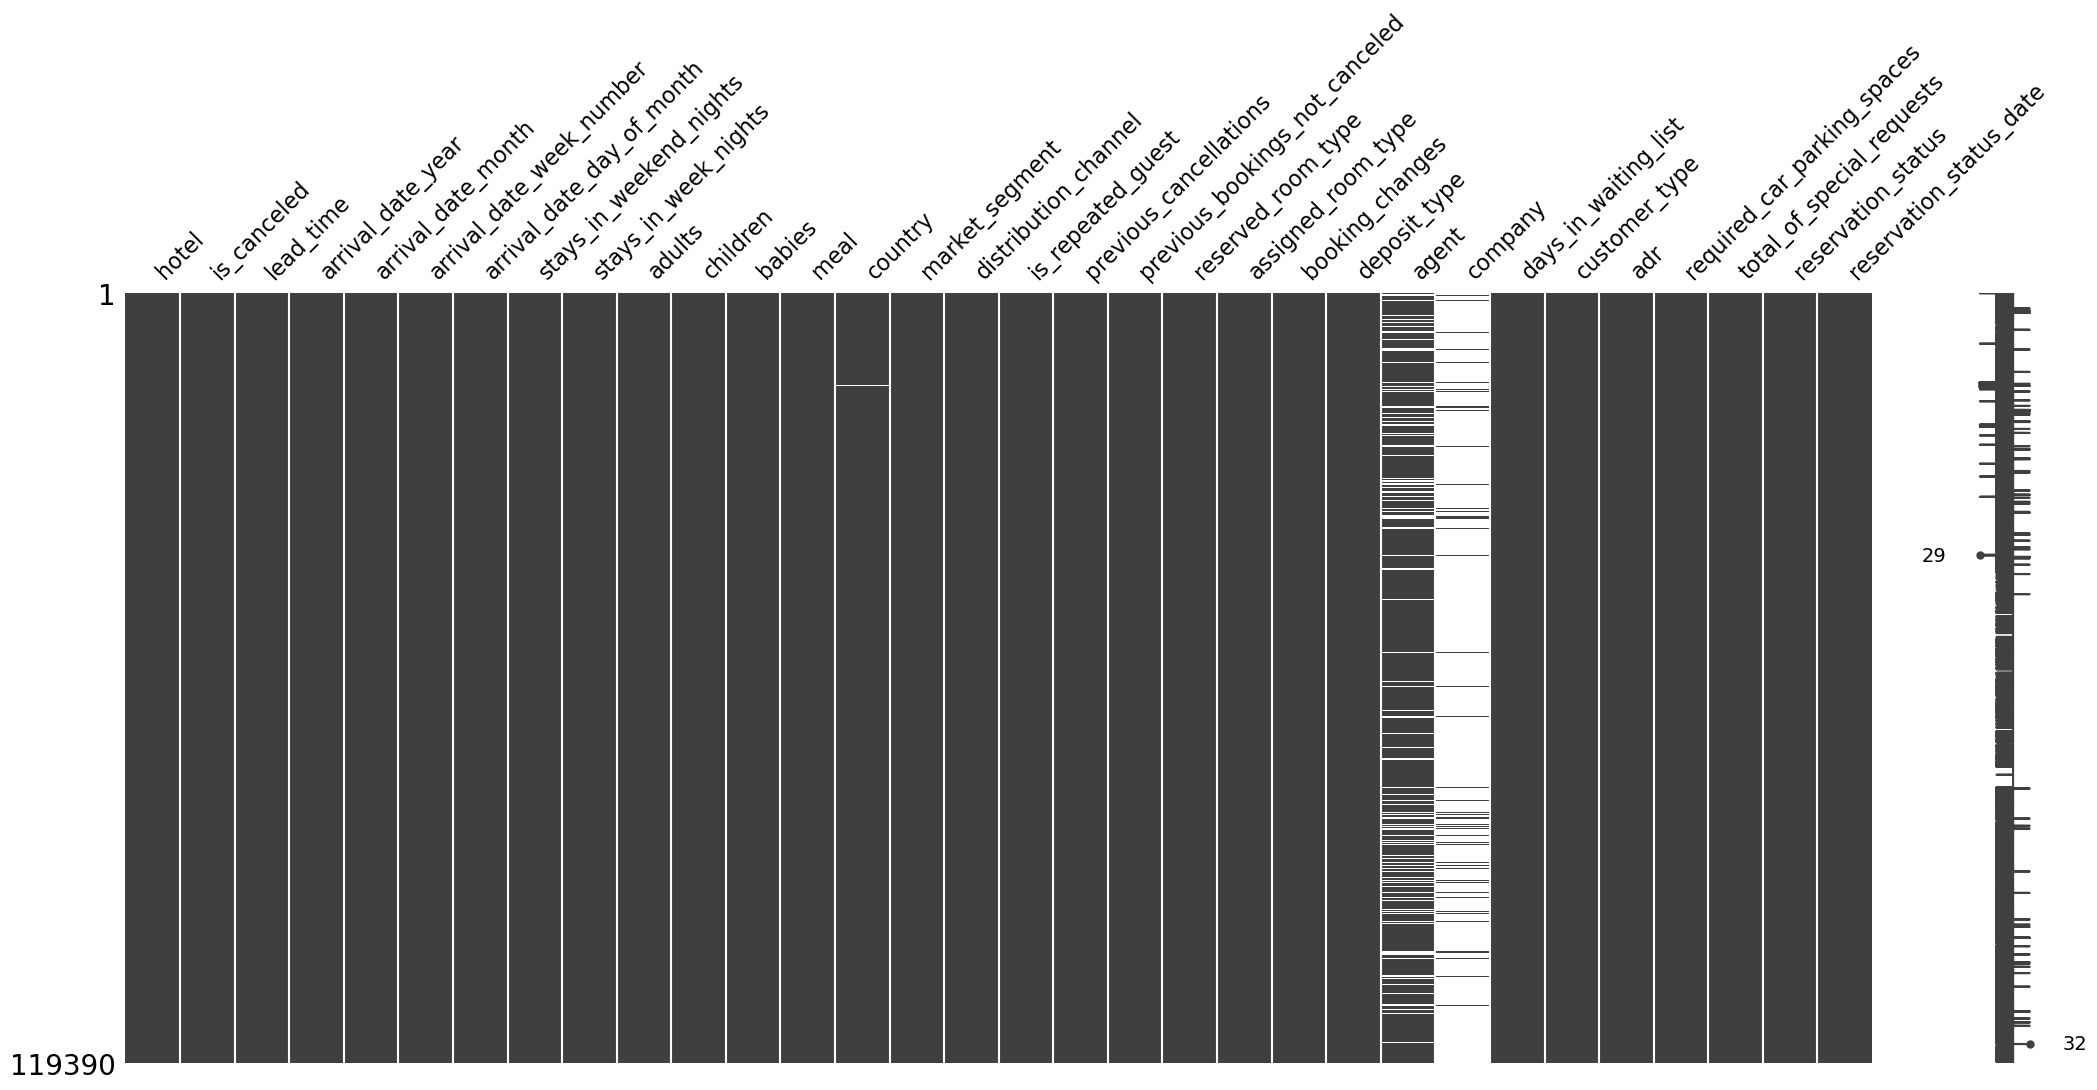

In [65]:
# Visualize missing data
msno.matrix(df)
plt.show()

In [66]:
total_cells=np.prod(df.shape)
total_missing=missing_values.sum()
print("total_cells: ",total_cells)
print("total_missing: ",total_missing)

total_cells:  3820480
total_missing:  129425


In [67]:
# percent of data that is missing
percent_missing=round((total_missing/total_cells)*100,1)
print(f"Percentage of missing data: {percent_missing}%")

Percentage of missing data: 3.4%


In [68]:
# Check duplicates
df.duplicated().sum()

np.int64(31994)

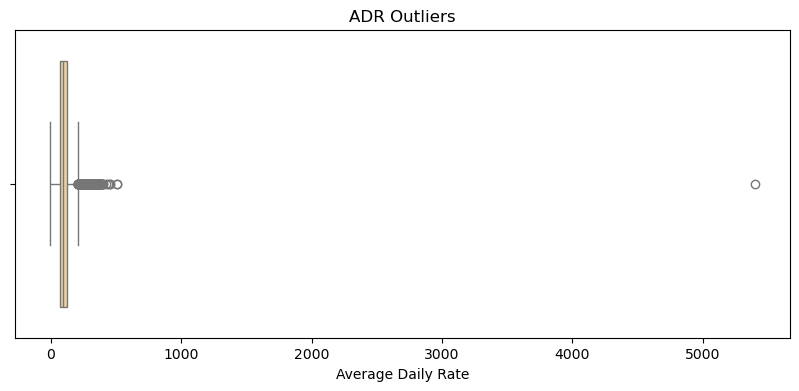

In [69]:
# Outlier detection with boxplots
plt.figure(figsize=(10,4))
sns.boxplot(x=df["adr"],palette=["#f7d693"])
plt.title("ADR Outliers")
plt.xlabel("Average Daily Rate")
plt.show()

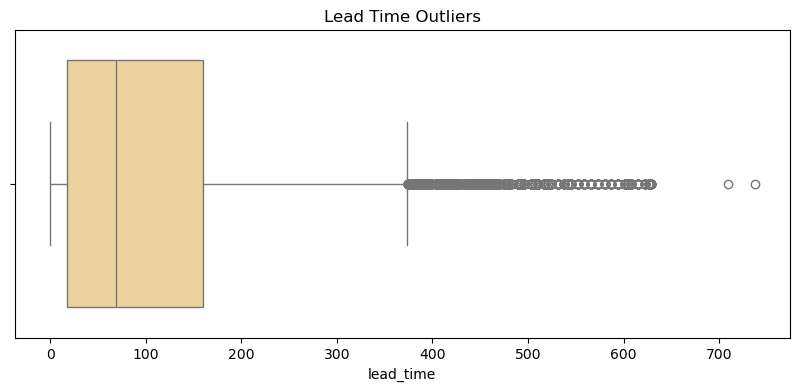

In [70]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["lead_time"],palette=[ "#f7d693"])
plt.title("Lead Time Outliers")
plt.show()

In [71]:
# IQR method for outlier detection
Q1=df["adr"].quantile(0.25)
Q3=df["adr"].quantile(0.75)
IQR=Q3-Q1
outliers=df[(df["adr"]<Q1-1.5*IQR) | (df["adr"]>Q3+1.5*IQR)]
print("Number of ADR outliers:",len(outliers))

Number of ADR outliers: 3793


### Phase 1: Data Quality Report
- Found missing values in `company`, `agent`, `country`, `children`.
- Outliers detected in `adr` (values >1000) and `lead_time` (>500 days).
- Duplicate rows exist in the dataset.
- `reservation_status_date` is stored as string, should be datetime.

Overall, the dataset requires handling missing values, correcting data types, addressing outliers, and removing duplicates before modeling.

---

### Phase 2: Data Cleaning

In [72]:
# Handle missing values
df["company"].fillna(0, inplace=True)
df["agent"].fillna(0, inplace=True)
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["children"].fillna(df["children"].median(), inplace=True)

In [73]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [74]:
# Handle outliers (cap ADR at 1000)
df.loc[df["adr"] > 1000, "adr"] = 1000

In [75]:
# Fix data types
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

### Phase 2: Data Cleaning Report

**Missing Values**
- `company` and `agent`: Replaced missing values with **0**.  
  *Reason:* These columns are identifiers, not continuous values. Missing means "no company" or "no agent", so replacing with 0 is more meaningful than imputing with an average.  

- `country`: Imputed missing values with the **mode (most frequent country)**.  
  *Reason:* Country is a categorical feature. Using the most frequent value preserves the distribution and avoids introducing noise.  

- `children`: Imputed missing values with the **median**.  
  *Reason:* Only a few values were missing, and the distribution is skewed. Median is more robust than mean in this case.  

**Outliers**
- `adr`: Capped values above **1000** at 1000.  
  *Reason:* These extreme values are likely errors or rare special cases. Capping prevents them from distorting the distribution and model training.  

**Duplicates**
- Removed exact duplicate rows.  
  *Reason:* Duplicates add no value and could bias the model.  

**Data Types**
- Converted `reservation_status_date` from string to **datetime** format.  
  *Reason:* Correct data types are essential for proper analysis and feature engineering.  

---

### Phase 3: Feature Engineering & Preprocessing

In [76]:
# Create new features
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = np.where((df["children"] + df["babies"]) > 0, 1, 0)

In [77]:
# Remove data leakage columns
df.drop(["reservation_status", "reservation_status_date"], axis=1, inplace=True)

In [78]:
# Encode categorical variables
# One-hot encoding for low-cardinality
low_cardinality = ["meal", "market_segment", "distribution_channel", "deposit_type"]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# Frequency encoding for country
country_counts = df["country"].value_counts().to_dict()
df["country_encoded"] = df["country"].map(country_counts)
df.drop("country", axis=1, inplace=True)


In [79]:
# Final Preparation

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Train shape:", train_set.shape)
print("Test shape:", test_set.shape)


Train shape: (69901, 46)
Test shape: (17476, 46)


### Phase 3: Feature Engineering & Preprocessing Report

**New Features**
- Created `total_guests` = adults + children + babies.  
- Created `total_nights` = stays_in_weekend_nights + stays_in_week_nights.  
- Created `is_family` = flag that indicates if children or babies are present.  

**Encoding**
- One-hot encoded low-cardinality features like `meal` and `market_segment`.  
- Applied frequency encoding to `country` because it has many categories. Each country was replaced with its frequency count. 


**Data Leakage**
- Dropped `reservation_status` and `reservation_status_date`.  
  These contain target information (cancellations) that would not be available before prediction.  

**Train/Test Split**
- Split data into 80% train and 20% test using `random_state=42`.  


---

## Final Insights:
- The dataset initially had significant missing values and extreme outliers.
- After cleaning:
  - No missing values remain.
  - Duplicates removed.
  - ADR outliers capped at 1000.
  - Dates corrected.
- Feature engineering added important new variables that better describe booking behavior.
- Categorical variables were encoded, and leakage columns were removed.
- Dataset was split into training (80%) and testing (20%) sets for modeling.